In [ ]:
import cv2
import numpy as np

def fft_multiply(image_a, image_b):
    # Get the FFT2 of both images
    fft_a = np.fft.fft2(image_a)
    fft_b = np.fft.fft2(image_b)

    # Multiply the complex conjugate of FFT2(A) with FFT2(B)
    fft_result = np.conj(fft_a) * fft_b

    # Get the inverse FFT of the result and display as abs()
    result = np.abs(np.fft.ifft2(fft_result))

    # Normalize the result to a range of [0, 255] for display
    result = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


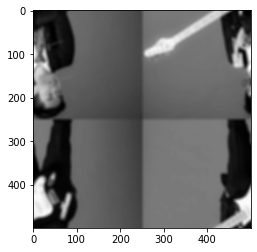

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

size = (500,500)

    
# load the images
A = cv2.imread('input_image.jpg', 0) # read as grayscale
phrase = cv2.imread('aperture_2_image.png', 0)


A = cv2.resize(A,size)
phrase = cv2.resize(phrase,size)

# perform FFT2 of both images
A_fft = np.fft.fft2(A)
phrase_fft = np.fft.fft2(phrase)

# multiply the complex conjugate of A_fft with phrase_fft
result_fft = np.conj(A_fft) * phrase_fft

# get the inverse FFT of the result and display as abs()
result = np.abs(np.fft.ifft2(result_fft))

# display the resulting image
plt.imshow(result, cmap='gray')
plt.show()


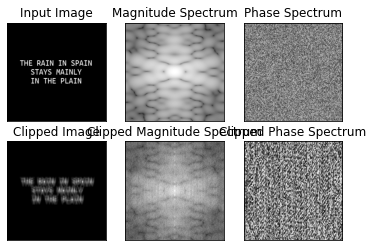

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [70]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def fourier_transform(image_path, aperture_path):
    
    size = (256,256)
    # Load image
    
    img = cv2.imread(image_path, 0)
    ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    ap = cv2.resize(ap,size)
    
    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_clipped = fshift*np.conj(fashift) # correlation operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_clipped = np.fft.ifftshift(fshift_clipped) # shifting back
    # img_clipped = cv2.normalize(img_clipped, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_clipped = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_clipped))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    phase_spectrum_clipped = np.angle(fshift_clipped)

    
    
    
    
    # Display images
    plt.subplot(231),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(img_clipped , cmap = 'gray')
    plt.title('Clipped Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
    plt.show()
    
    plt.imsave('correlated_A.jpg', img_clipped, cmap='gray')

    
    return img_clipped

fourier_transform('phrase_2.jpg', 'A.jpg')



    
    


In [75]:
import imageio
import os

# using a raw string
# directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\sine_plots\varying_freq"
directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_correlation\A_correlation"


# create a list of image file names in the directory
image_files = os.listdir(directory)

# sort the list of image file names to ensure proper ordering in the GIF
image_files.sort()

# define the output GIF file name
output_file = "A_correlation.gif"

# create a list to store the image file paths
image_paths = []

# iterate over the list of image file names and add the file path to image_paths
for filename in image_files:
    if filename.endswith(".jpg"):
        image_paths.append(os.path.join(directory, filename))

# create the GIF from the list of image file paths
with imageio.get_writer(output_file, mode="I") as writer:
    for image_path in image_paths:
        # read the image in RGBA format
        image = imageio.imread(image_path, pilmode="RGBA")
        # set the alpha channel to 255 (fully opaque)
        alpha = image[:, :, 3]
        alpha[alpha != 0] = 255
        image[:, :, 3] = alpha
        # append the image to the GIF
        writer.append_data(image)


In [76]:
import imageio
import os

# using a raw string
# directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\sine_plots\varying_freq"
directory = r"C:\Users\Lyle\Desktop\Computation and Modelling\image-processing\frequency_domain\fourier_correlation\B_correlation"


# create a list of image file names in the directory
image_files = os.listdir(directory)

# sort the list of image file names to ensure proper ordering in the GIF
image_files.sort()

# define the output GIF file name
output_file = "B_correlation.gif"

# create a list to store the image file paths
image_paths = []

# iterate over the list of image file names and add the file path to image_paths
for filename in image_files:
    if filename.endswith(".jpg"):
        image_paths.append(os.path.join(directory, filename))

# create the GIF from the list of image file paths
with imageio.get_writer(output_file, mode="I") as writer:
    for image_path in image_paths:
        # read the image in RGBA format
        image = imageio.imread(image_path, pilmode="RGBA")
        # set the alpha channel to 255 (fully opaque)
        alpha = image[:, :, 3]
        alpha[alpha != 0] = 255
        image[:, :, 3] = alpha
        # append the image to the GIF
        writer.append_data(image)
